<a href="https://colab.research.google.com/github/prajvarun/FMML_Project_and_Labs/blob/main/lab_3_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**

Try these questions for better understanding. You may not be able to solve all of them.

**1.What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?**

**2.Can you increase the accuracy by increasing the number of augmentations from each sample?**

**3.Try implementing a few augmentations of your own and experimenting with them. A good reference is here.**

**4.Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?**


2)
Increasing the number of augmentations from each sample can potentially improve the accuracy of a machine learning model, especially in scenarios where data augmentation helps regularize the model, increase its generalization, and make it more robust. However, there are some important considerations to keep in mind:

**Overfitting:** If you apply too many augmentations to a single sample, you run the risk of overfitting. Overfitting occurs when the model becomes too specialized in the training data and performs poorly on unseen data. Augmentations should strike a balance between adding diversity to the training data and not making the data too dissimilar from the real-world data your model will encounter.

**Computational Resources:** Increasing the number of augmentations per sample can significantly increase the computational cost of training, as each augmented sample must be processed separately during training. This can slow down training and may require more memory and processing power.

**Data Distribution:** It's important to consider the distribution of augmented data. If you apply too many augmentations, you might create a dataset where certain augmented samples dominate the training data, potentially biasing the model.

**Impact of Augmentations:** Not all augmentations will improve model performance. Some augmentations might be irrelevant or even harmful to your task. It's essential to carefully select and test augmentations to see how they affect model performance.

**Hyperpagrameter Tunin:** When you increase the number of augmentations, you may need to adjust other hyperparameters, such as the learning rate, to ensure the model converges correctly.

**omain-Specific Considerations**: The impact of augmentations can vary depending on the specific domain and dataset. What works well for one task may not work as effectively for another.

In practice, it's advisable to start with a moderate number of augmentations and monitor the model's performance on a validation set. You can then gradually increase the number of augmentations while keeping an eye on metrics like validation accuracy. This iterative approach helps strike the right balance between data augmentation and preventing overfitting.

Additionally, techniques like cutout, mixup, and dropout can also be used in conjunction with data augmentation to regularize models and improve their accuracy without relying solely on increasing the number of augmentations from each sample

[ ]


In [ ]:
#3.Try implementing a few augmentations of your own and experimenting with them. .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


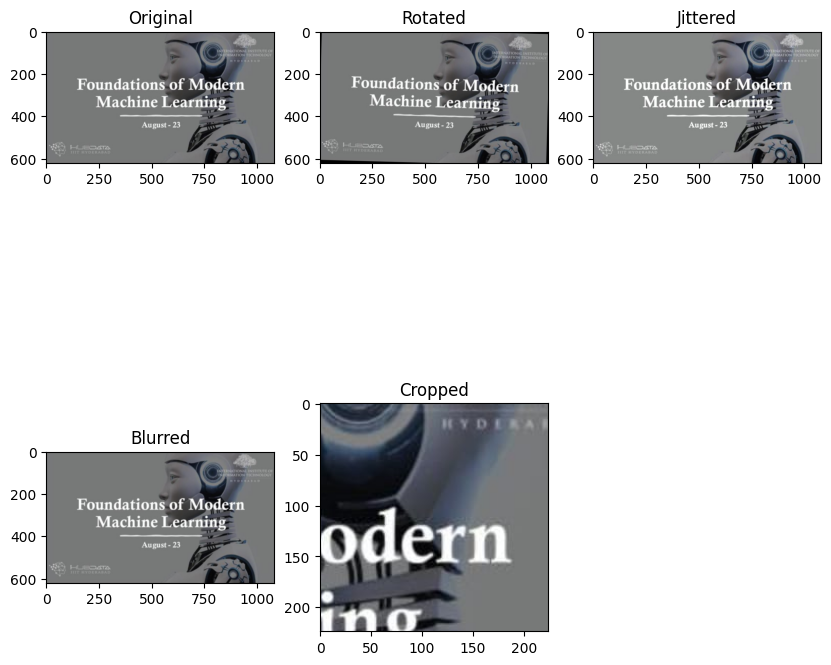

In [5]:
%pip install opencv-python-headless numpy matplotlib
import cv2
import numpy as np
import io
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load an example image
image_path = '/content/drive/My Drive/fmml/fmml.jpeg'
image = cv2.imread(image_path)

def random_color_jitter(image, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[..., 1] *= (1.0 + np.random.uniform(-saturation, saturation))
    hsv[..., 2] *= (1.0 + np.random.uniform(-brightness, brightness))
    hsv[..., 0] += np.random.uniform(-hue, hue)
    hsv[hsv > 255] = 255
    hsv[hsv < 0] = 0
    image = cv2.cvtColor(np.array(hsv, dtype=np.uint8), cv2.COLOR_HSV2BGR)
    return image
def random_gaussian_blur(image, max_kernel_size=5):
    kernel_size = np.random.randint(1, max_kernel_size // 2) * 2 + 1  # Ensure it's an odd number
    image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return image
def random_crop(image, crop_size=(224, 224)):
    h, w = image.shape[:2]
    x = np.random.randint(0, w - crop_size[0] + 1)
    y = np.random.randint(0, h - crop_size[1] + 1)
    cropped_image = image[y:y + crop_size[1], x:x + crop_size[0]]
    return cropped_image
def random_rotation(image, max_angle=15):
    angle = np.random.uniform(-max_angle, max_angle)
    h, w = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated_image


# Apply custom augmentations
jittered_image = random_color_jitter(image)
blurred_image = random_gaussian_blur(image)
cropped_image = random_crop(image)
rotated_image = random_rotation(image)


# Display the original and augmented images
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(jittered_image, cv2.COLOR_BGR2RGB)), plt.title('Jittered')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)), plt.title('Cropped')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)), plt.title('Rotated')

plt.show()


